<a href="https://colab.research.google.com/github/muyezhu/connectome/blob/master/cic_skills_case_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
# review: pandas uses DataFrame to represent tabular data
# each row in a DataFrame is an observation/unit/entity, each column in a DataFrame is a feature associated with observations
# each row and column has a label within the DataFrame. The row labels are known as an "Index"
# example: grocery store sales of egg and milk on Monday through Friday
# what are the rows and columns?

In [0]:
# possibility 1
#          egg     milk
# Mon       1        1
# Tue       3        2
# Wed       0        8
# Thurs     9        2
# Friday    8        8
# what is the index? what are the column names?

In [0]:
# review: each column in a DataFrame is a "Series". the name of the Series is identical to the column name
# Series have index too. aka the rows in Series also have labels. all Series in the same DataFrame share identical index
# to create a DataFrame, we provide each Series as 'series_name/column_name': series_data
sales1 = {
    'egg': [1, 3, 0, 9, 8],
    'milk': [1, 2, 8, 2, 8]
}
df_sales1 = pd.DataFrame(data=sales1)
df_sales1

In [0]:
# good. but something's missing. notice the index of the DataFrame: it's now 0, 1, 2, 3, 4. this is the default index (known as RangeIndex)
# pandas assigns for a DataFrame if user didn't specify the index. but we want the index to be the week days instead
weekdays = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri']
sales1 = {
    'egg': [1, 3, 0, 9, 8],
    'milk': [1, 2, 8, 2, 8]
}
df_sales1 = pd.DataFrame(data=sales1, index=weekdays)
df_sales1

In [0]:
# notice: the index, if given, must have the same number of entries as the data columns.
# try in this cell what happens if we remove one entry from weekdays


In [0]:
# possibility 2: how should we fill this following table which has egg and milk as the rows now?
#        Mon     Tue     Wed     Thur    Fri
# egg
# milk

In [0]:
#        Mon     Tue     Wed     Thur    Fri
# egg     1       3       0        9      8
# milk    1       2       8        2      8

In [0]:
# now make a DataFrame for this table
# here's some hints
items = ['egg', 'milk']
sales2 = {
    'Mon': [1, 1],
}

In [0]:
items = ['egg', 'milk']
sales2 = {
    'Mon': [1, 1],
    'Tue': [3, 2],
    'Wed': [0, 8],
    'Thur': [9, 2], 
    'Fri': [8, 8]
}
df_sales2 = pd.DataFrame(data=sales2, index=items)
df_sales2

In [0]:
# to access individual Series in the DataFrame, for example the 'Mon' Series in df_sales2
df_sales2['Mon']

In [0]:
# now try access the 'milk' Series from df_sales1 here


In [0]:
df_sales1['milk']

In [0]:
# .loc accessor: allows accessing elements in the DataFrame with row and column labels
# using df_sales2, to retrieve egg sales on Wednesday
df_sales2.loc['egg', 'Wed']

In [0]:
# .loc accessor: if only row label is given, all columns in the row are returned
df_sales2.loc['egg']

In [0]:
# .loc also accept list of row and column labels
df_sales2.loc[['egg', 'milk'], ['Tue', 'Wed', 'Thur']]

In [0]:
# .loc accessor also understands a range of labels
# using df_sales2 to retrieve egg and milk sales from Tuesday to Thursday
df_sales2.loc['egg': 'milk', 'Tue': 'Thur']

In [0]:
# now try retrieve milk sales from Wed to Friday from df_sales1


In [0]:
df_sales1.loc['Wed':'Fri', 'milk']

In [0]:
# .loc can also be used to select an entire series/column in a dataframe. think about how
# try access the 'milk' Series from df_sales1 again, this time with .loc

In [0]:
df_sales1.loc[:, 'milk']

In [0]:
# finally, .loc understands list of boolean values
# when a True value is encountered, the corresponding row/column is slected. 
# with pick_days, we select only Monday and Thursday
pick_days = [True, False, False, True, False]
df_sales2.loc[:, pick_days]

In [0]:
# now try select from df_sales1 the Tuesday and Friday rows


In [0]:
df_sales1.loc[[False, True, False, False, True], :]

In [0]:
# we can also use .loc to add new rows. note the index of the new row needs to be one that doesn't exist in the current dataframe
# otherwise an old row will be overwritten with new data
df_sales2.loc['ham'] = [7, 6, 2, 2, 5]
df_sales2

In [0]:
# how about adding new column? recall how to access a column: df_sales2['Mon'], without .loc
# if we use the same syntax with a column label that doesn't exist in the dataframe, we can create a new column
df_sales2['Sat'] = [20, 30, 19]
df_sales2

In [0]:
# now try to work adding row and column to df_sales1, such that df_sales1 will have sales data for egg, milk, ham from Mon to Sat
# sales data should match between df_sales2 and df_sales1


In [0]:
df_sales1['ham'] = [7, 6, 2, 2, 5]
df_sales1.loc['Sat'] = [20, 30, 19]
df_sales1

In [0]:
# pd.DataFrame.describe(): generate descriptive statistics of a dataframe
df_sales1.describe()

In [0]:
# compare dataframe entries to a given value 
df_sales1 > 0

In [0]:
# output if df_sales1's ham series is less than 10


In [0]:
df_sales1['milk'] < 10

In [0]:
# pd.DataFrame.mean()
# average egg, milk and ham sales in a week
# axis=0 tells pandas to calculate mean for each column
# similarly, axis=1 will calculate mean for each row
# by default, pandas consider axis to be equal to 0
df_sales1.mean(axis=0)

In [0]:
df_sales1.mean()

In [0]:
# pd.DataFrame.sum()
# calculate total number of items sold each day in df_sales1


In [0]:
df_sales1.sum(axis=1)

In [0]:
# pd.DataFrame.max()
df_sales1.max()

In [0]:
# pd.DataFrame.std(): standard deviation. 
# roughly, it is the average distance from a data point to the mean of the data set
df_sales1.std()

In [0]:
# read dataset of individual height, weight, age, gender
howell_url = 'https://drive.google.com/uc?export=download&id=1gN0K5H9ybNqsZm_L6x4tcZV-a-nj17r4'
df_height = pd.read_csv(howell_url, index_col=0)
df_height = df_height.rename(columns={'male': 'gender'})
df_height.gender = df_height.gender.astype('category').cat.rename_categories(['female', 'male'])
df_height.head()

In [0]:
df_height.describe()

In [0]:
# lets examine adults, who are >= 18 of age
# .loc accessor comes in again
# how to select only the adult portion of the dataframe?


In [0]:
df_height_adult = df_height.loc[df_height.age >= 18, :]
df_height_adult[['age', 'height']].describe()

In [0]:
# frequencies of adult heights by gender (essentially a smooth histogram)
# what can you conclude from the figure
import seaborn as sns
sns.distplot(df_height_adult.loc[df_height_adult.gender == 'male', 'height'], hist=False, label='adult male')
sns.distplot(df_height_adult.loc[df_height_adult.gender == 'female', 'height'], hist=False, label='adult female')
sns.distplot(df_height_adult.loc[:, 'height'], hist=False, label='adult male + female')

In [0]:
# the average adult male height is greater than the adult female heights
# when male and female data are combined, the curve become flatter and loses the sharp peak
# and flatter means greater standard deviation

In [0]:
df_height_adult.groupby('gender')['height'].describe()

In [0]:
# standard deviation is deeply connected to ANOVA, an important statistical used to 
# test differences between group means (control vs treatment, treatment1 vs treatment2 vs treatment3 etc)
from scipy.stats import f_oneway
F, pval = f_oneway(df_height_adult.loc[df_height_adult.gender == 'male', 'height'], 
                   df_height_adult.loc[df_height_adult.gender == 'female', 'height'])
# the ANOVA test is very, very, very sure that the mean of female and male adult heights are different 
print('p-value for one way anova = ', pval)

In [0]:
# if we combine adult and children, the standard deviation visibly increase
sns.distplot(df_height.loc[df_height.gender == 'male', 'height'], hist=False, label='all male')
sns.distplot(df_height.loc[df_height.gender == 'female', 'height'], hist=False, label='all female')

In [0]:
df_height.groupby('gender')['height'].describe()

In [0]:
# the ANOVA test is still very sure that the mean of female and male heights are different, but
# less so then when only adults are examined
F, pval = f_oneway(df_height.loc[df_height.gender == 'male', 'height'], 
                   df_height.loc[df_height.gender == 'female', 'height'])
print('p-value for one way anova = ', pval)

case tracker over view:

For each brain, which is assigned a case ID

* Tissue processing stages
    1. Surgery: surgery date, planned injection location, survived surgery, perfusion date, surgeon (injection strategy, etc)
    2. Sectioning: section date, plane, thickness, tech
    3. Staining: staining date, staining target, tech
    4. Mounting: mounting date, tech
    5. Scanning: scanning date, vsi path, actual injection location, quality, tech

* Image processing stages
    1. Import: osp path, tech
    2. Registration
    3. Threshold
    4. Overlap

* Big picture stuff
    1. Scientific project
    2. Quarterly report

In [0]:
# say we want to create a DataFrame of case trackers. what do you think the DataFrame should looke like?
# whats the row index? what are the columns?

In [0]:
ids = ['SW190319-01', 'SW190320-01']
simple_tracker = {
    'surgeon': ['A', 'B'],
    'survived_surgery': [True, False]
}
df_simple_tracker = pd.DataFrame(data=simple_tracker, index=ids)
df_simple_tracker

In [0]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
from numpy.random import choice, uniform
import matplotlib.pyplot as plt


def workdays_2020():
      # don't come to work on weekends / holidays!
      bday_offset = CustomBusinessDay(calendar=USFederalHolidayCalendar())
      # a list of working days
      work_days = pd.bdate_range(start='2020-01-01', end='2020-12-31', freq=bday_offset)
      return work_days

def generate_case_ids():
      # gather all work days in 2020 (exclude weekends, holidays)
      work_days = workdays_2020()
      # on each work day, between [0, 10] surgeries are done, with 4 surgeries being the most common occurrence
      # surgery numbers   0  1  2  3  4  5  6  7  8  9  10 
      chances = np.array([2, 2, 3, 3, 4, 3, 3, 2, 2, 1, 1])
      case_ids = []
      ns = []
      for work_day in work_days:
          n = choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], p=chances / np.sum(chances))
          ns.append(n)
          if n > 0:
              case_ids.extend(['SW{}-{}'.format(work_day.strftime('%Y%m%d'), str(i).zfill(2)) for i in range(1, n + 1)])
      plt.hist(ns)    
      plt.xlabel('number of surgeries in a day')
      return case_ids   


def generate_techs(n):
    all_techs = ['Amy', 'Andrew', 'Emma', 'Mathew', 'Lucy', 'Edward', 'Danice', 'Zack', 'Betty', 'Rob']
    return choice(all_techs, size=(n,), replace=True)

In [0]:
# let's simulate the bare minimum components for a dataframe of case trackers in 2020
def generate_case_trackers():
    np.random.seed(13)
    # assuming surgeons work on non holiday weekdays, and between [0, 10] cases of surgeries
    # are conducted on such days, lets generate case_ids, which is also the index of our dataframe
    case_ids = generate_case_ids()
    n_cases = len(case_ids)
    # now we add some columns
    case_tracker = {
        # date of surgery: from case id. this series is of "datetime" type. more on this later 
        'surgery_date': pd.to_datetime(case_ids, format='%Y%m%d', exact=False),
        # planned coordinates (x, y, z)
        'planned_x': uniform(low=0, high=3, size=(n_cases,)),
        'planned_y': uniform(low=-7, high=4, size=(n_cases,)),
        'planned_z': uniform(low=-5, high=0, size=(n_cases,)),
        # the surgeon for each case
        'surgeon': generate_techs(n_cases),
        # whether animal survived the surgery
        'survived_surgery': choice([True, False], size=(n_cases,), p=[0.9, 0.1])
    }
    df_tracker = pd.DataFrame(data=case_tracker, index=case_ids)
    return df_tracker

,surgery_date,planned_x,planned_y,planned_z,surgeon,survived_surgery
SW20200102-01,2020-01-02,0.952306,-4.966877,-0.414353,Lucy,True
SW20200102-02,2020-01-02,0.244974,-1.951816,-2.425571,Danice,True
SW20200102-03,2020-01-02,1.098506,-2.656336,-1.695503,Danice,True
SW20200102-04,2020-01-02,2.711921,-3.997281,-0.138289,Lucy,True
SW20200102-05,2020-01-02,0.368165,2.953238,-3.628364,Zack,True


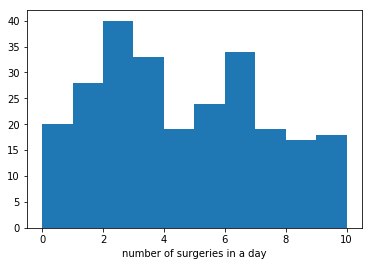

In [0]:
df_case_tracker = generate_case_trackers()  
df_case_tracker.head(n=5)

In [0]:
df_case_tracker.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1046 entries, SW20200102-01 to SW20201231-03
Data columns (total 6 columns):
surgery_date        1046 non-null datetime64[ns]
planned_x           1046 non-null float64
planned_y           1046 non-null float64
planned_z           1046 non-null float64
surgeon             1046 non-null object
survived_surgery    1046 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), object(1)
memory usage: 50.1+ KB


variable types in statistical analyses (proposed by Stanley Smith Stevens)
* nominal (categorical): unordered categorical variables, where a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values. for nominal variables, the categories have no logical orderings. e.g. blood type, race, gender, zip code
* ordinal (categorical): ordered categorical variables. e.g. movie ratings ("great", "good", "meh", "sucks!"), income levels ("high income", "median income", "low income"), military rank
* interval (numerical): ordered. additionally, difference between two values are meaningful.  e.g. temperature, credit score
* ratio (numerical): has all the properties of an interval variable, and also has a clear definition of zero. When the variable equals 0.0, there is none of that variable. e.g. heart rate, enzyme activity, weight

In [0]:
# what type of variable is "planned_x"?

In [0]:
# what type of variable is "surgeon"? what about "survived_surgery"?
# surgeon: nominal
# survived_surgery: nominal / ordinal

In [0]:
# lets change the surgeon column to unordered categorical variable
df_case_tracker['surgeon'] = df_case_tracker['surgeon'].astype('category')
df_case_tracker['surgeon'].dtype

CategoricalDtype(categories=['Amy', 'Andrew', 'Betty', 'Danice', 'Edward', 'Emma', 'Lucy',
                  'Mathew', 'Rob', 'Zack'],
                 ordered=False)

In [0]:
df_case_tracker['surgeon'].value_counts(sort=False)

Amy       114
Andrew    107
Betty     119
Danice     92
Edward    123
Emma      118
Lucy      107
Mathew    105
Rob       135
Zack      109
Name: surgeon, dtype: int64

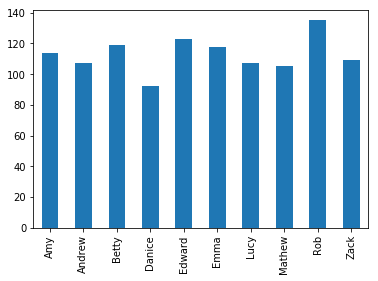

In [0]:
_ = df_case_tracker['surgeon'].value_counts(sort=False).plot(kind='bar')

In [0]:
# is "surgery_date" nominal, ordinal, interval or ratio?

In [0]:
# series or index with datetime dtype supports many powerful pandas time series functionalities
# for example, we can easily compare the datetime entries to a certain time of interest
# are the surgery dates later than 2020 jan 1st?
later_than_jan_1st = df_case_tracker['surgery_date'] > '2019-Jan-01'
later_than_jan_1st.head()

SW20200103-01    True
SW20200103-02    True
SW20200103-03    True
SW20200103-04    True
SW20200103-05    True
Name: surgery_date, dtype: bool

In [0]:
# are the surgery dates earlier than 2019 dec 31 st?
# note than various format of specifying dates are recognized
earlier_than_2020 = df_case_tracker['surgery_date'] < '2019-12-23'
earlier_than_2020.head()

SW20200103-01    False
SW20200103-02    False
SW20200103-03    False
SW20200103-04    False
SW20200103-05    False
Name: surgery_date, dtype: bool

In [0]:
# are the surgery dates later than 2020 jan 1st but earlier than 2020 jan 6th?
between_jan_1st_and_6th = (df_case_tracker['surgery_date'] > '2020-Jan-1') & (df_case_tracker['surgery_date'] < '2020-1-6')
between_jan_1st_and_6th.head(n=10)

SW20200103-01     True
SW20200103-02     True
SW20200103-03     True
SW20200103-04     True
SW20200103-05     True
SW20200106-01    False
SW20200106-02    False
SW20200106-03    False
SW20200106-04    False
SW20200107-01    False
Name: surgery_date, dtype: bool

In [0]:
# this allows us to filter for surgeries performed during certain time periods
# for example, let's select all cases for which surgeries were done between Feb 3rd and Feb 6th
# we will again use the .loc accessor
# .loc[row_criteria, col_criteria]
dates_wanted = (df_case_tracker['surgery_date'] >= '2020-Feb-3') & (df_case_tracker['surgery_date'] <= '2020-Feb-6')
df_feb36 = df_case_tracker.loc[dates_wanted]
df_feb36

,surgery_date,planned_x,planned_y,planned_z,surgeon,survived_surgery
SW20200204-01,2020-02-04,2.732302,-3.542454,-4.739197,Edward,True
SW20200204-02,2020-02-04,1.144503,3.690253,-4.958952,Emma,True
SW20200204-03,2020-02-04,0.353386,1.821058,-4.651987,Rob,True
SW20200204-04,2020-02-04,2.695471,-0.036468,-2.488543,Edward,True
SW20200204-05,2020-02-04,2.020961,-5.696820,-0.202447,Amy,False
SW20200205-01,2020-02-05,0.945614,-2.344567,-0.461332,Mathew,True
SW20200205-02,2020-02-05,1.173883,-0.618801,-0.865449,Amy,True
SW20200205-03,2020-02-05,2.229396,2.487033,-1.138335,Amy,True
SW20200205-04,2020-02-05,1.579378,-0.797743,-4.820356,Edward,True
SW20200205-05,2020-02-05,2.171942,-0.881131,-2.119757,Lucy,True


In [0]:
# quiz 1 
# select the rows in the df_case_tracker (all columns included) where
# (1) surgery was done on or later than 2020 Dec 10th, and
# (2) animal has died (~)
# logical and operator &: 
#     True & True = True
#     True & False = False
#     False & False = False
# logical negate operator ~: 
#     ~False = True
#     ~True = False

In [0]:
# example of ~ operator
df_case_tracker['survived_surgery'].head()

SW20200103-01     True
SW20200103-02     True
SW20200103-03     True
SW20200103-04     True
SW20200103-05    False
Name: survived_surgery, dtype: bool

In [0]:
(~df_case_tracker['survived_surgery']).head()

SW20200103-01    False
SW20200103-02    False
SW20200103-03    False
SW20200103-04    False
SW20200103-05     True
Name: survived_surgery, dtype: bool

In [0]:
# quiz 1 solution
selection_creteria = (df_case_tracker['surgery_date'] >= '2020-Dec-10') & (~df_case_tracker['survived_surgery'])
df_selection = df_case_tracker.loc[selection_creteria]
df_selection

,surgery_date,planned_x,planned_y,planned_z,surgeon,survived_surgery
SW20201215-01,2020-12-15,1.503624,0.561322,-1.589096,Rob,False
SW20201223-02,2020-12-23,2.223282,-4.815906,-0.997849,Rob,False
SW20201223-08,2020-12-23,1.291895,2.383293,-3.780007,Zack,False
SW20201224-04,2020-12-24,1.474479,1.783433,-0.079474,Mathew,False


In [0]:
# quiz 2
# select the rows in the df_case_tracker (all columns included) where
# (1) surgery was done in December of 2020
# (2) the surgeon was either Amy or Zack
# logical or operator |: 
#     True | True = True
#     True | False = True
#     False | False = False
# be careful with operator evaluation order

In [0]:
# solution 1 to quiz 2
# explicitly use the | operator to specify surgeons
selection_creteria = (df_case_tracker['surgery_date'] >= '2020-Dec') & ((df_case_tracker['surgeon'] == 'Amy') | (df_case_tracker['surgeon'] == 'Zack'))
df_selection = df_case_tracker.loc[selection_creteria]
df_selection

,surgery_date,planned_x,planned_y,planned_z,surgeon,survived_surgery
SW20201204-03,2020-12-04,1.253491,-3.064807,-0.327320,Zack,True
SW20201207-04,2020-12-07,0.931292,3.173511,-3.952446,Amy,True
SW20201207-05,2020-12-07,1.664090,-3.675409,-2.209292,Amy,True
SW20201207-07,2020-12-07,0.758076,-6.771643,-3.604992,Zack,True
SW20201209-03,2020-12-09,1.932855,0.328110,-2.968339,Zack,True
SW20201209-04,2020-12-09,0.298030,-1.000985,-1.328971,Zack,True
SW20201214-01,2020-12-14,1.544210,0.105060,-0.288397,Zack,True
SW20201214-06,2020-12-14,1.788690,1.158368,-1.988934,Zack,True
SW20201216-03,2020-12-16,1.920867,-2.794823,-1.084185,Zack,True
SW20201216-05,2020-12-16,0.713735,1.289798,-2.790955,Amy,True


In [0]:
# solution 2 to quiz 2
# use the DataFrame.isin function. this is more succint and efficient than using logical operator 
selection_creteria = (df_case_tracker['surgery_date'] >= '2020-Dec') & (df_case_tracker['surgeon'].isin({'Amy', 'Zack'}))
df_selection = df_case_tracker.loc[selection_creteria]
df_selection

,surgery_date,planned_x,planned_y,planned_z,surgeon,survived_surgery
SW20201204-03,2020-12-04,1.253491,-3.064807,-0.327320,Zack,True
SW20201207-04,2020-12-07,0.931292,3.173511,-3.952446,Amy,True
SW20201207-05,2020-12-07,1.664090,-3.675409,-2.209292,Amy,True
SW20201207-07,2020-12-07,0.758076,-6.771643,-3.604992,Zack,True
SW20201209-03,2020-12-09,1.932855,0.328110,-2.968339,Zack,True
SW20201209-04,2020-12-09,0.298030,-1.000985,-1.328971,Zack,True
SW20201214-01,2020-12-14,1.544210,0.105060,-0.288397,Zack,True
SW20201214-06,2020-12-14,1.788690,1.158368,-1.988934,Zack,True
SW20201216-03,2020-12-16,1.920867,-2.794823,-1.084185,Zack,True
SW20201216-05,2020-12-16,0.713735,1.289798,-2.790955,Amy,True


In [0]:
# using isin, you can easily include more surgerons. e.g. december cases done by Amy, Zack or Andrew
selection_creteria = (df_case_tracker['surgery_date'] >= '2020-Dec') & (df_case_tracker['surgeon'].isin({'Amy', 'Zack', 'Andrew'}))
df_selection = df_case_tracker.loc[selection_creteria]
df_selection

,surgery_date,planned_x,planned_y,planned_z,surgeon,survived_surgery
SW20201201-01,2020-12-01,2.152066,-5.069098,-1.520112,Andrew,True
SW20201204-03,2020-12-04,1.253491,-3.064807,-0.327320,Zack,True
SW20201204-04,2020-12-04,1.645094,-3.186736,-4.512575,Andrew,True
SW20201207-04,2020-12-07,0.931292,3.173511,-3.952446,Amy,True
SW20201207-05,2020-12-07,1.664090,-3.675409,-2.209292,Amy,True
SW20201207-06,2020-12-07,0.257945,1.610868,-0.163138,Andrew,True
SW20201207-07,2020-12-07,0.758076,-6.771643,-3.604992,Zack,True
SW20201209-03,2020-12-09,1.932855,0.328110,-2.968339,Zack,True
SW20201209-04,2020-12-09,0.298030,-1.000985,-1.328971,Zack,True
SW20201211-01,2020-12-11,2.602386,-5.387440,-2.156444,Andrew,True


In [0]:
# quiz 3
# suppose we want to write a paper about BLA connectome and want injections in or near BLA
# target injection site has coordinate x = 3.25, y = -1.555, z = -5.25 (ARA 72 BLA)
# (1) compute the euclidean distance of every planned injection to the target
#     add the computed euclidean distance as a new column 'distance' to df_case_tracker 
#     distance = sqrt(delta_x * delta_x + delta_y * delta_y + delta_z * delta_z) 
# (2) re-rank the rows, such that cases with planned injection closest to target as on top
# (3) remove the 'distance' column. re-rank the rows by case id again

In [0]:
# quiz 4
# (1) read an overlap csv files produced in connection lens into a dataframe. 
#     use the 15th line '(HEMISPHERE:R:G:B), ATLAS ONLY, OVERLAP, REGION' as header
# (2) '(HEMISPHERE:R:G:B)' is not very useful right now since it has a mixture of information
#     and characters. expand this single column into 4 columns:  HEMISPHERE, R, G, B
#     this step I will show you since we haven't covered any functions needed
# (3) find out how many overlap pixels are in the ipsilateral brain versus contralateral
# (4) find the region with most overlap pixels
# (5) find all regions with non zero overlap pixels
# (6) find the total area of each region, combine both hemispheres

In [0]:
# this is a lot more advanced, as a show case of how we may potentially identify period of time where technical failures seem to occur more frequently than usual
# if we also have records of equipment, reagent information for some time periods, it's possible to systemically find conditions detrimental for experiments
# resample: divides data into specified time intervals, here each interval is a week, with each week starting on monday
# the mean surgery survival is calculated for each week, based on the weekly intervals
# the survival percent is then sorted, and 5 weeks with lowest surgery survival rate through 2020 is shown
df_case_tracker.resample('W-Mon', on='surgery_date', label='right')['survived_surgery'].mean().sort_values().head(n=5)

In [0]:
# annual surgery survival rate (it's quite close to the value we used to simulate the case tracker data)
df_case_tracker['survived_surgery'].mean()

In [0]:
# what is a normal range of survival rate for a given week? because we have assigned a known individual survival rate here, 
# we can actually compute 95% confidence interval of weekly survival rates. but this is beyond the scope for now.

In [0]:
# now lets move on to add perfusion dates
# lets say on average, perfusion happens 2 days after surgery
from numpy.random import exponential
days_till_perfuse = exponential(scale=2, size=(df_case_tracker.shape[0],))
print('average days till perfusion =', np.mean(days_till_perfuse))
days_till_perfuse = pd.to_timedelta(days_till_perfuse, unit='days')
# add new column "perfusion_date", where perfusion_date = surgery_date + days_till_perfuse
df_case_tracker['perfusion_date'] = df_case_tracker['surgery_date'] + days_till_perfuse
df_case_tracker['perfusion_date'] = df_case_tracker['perfusion_date'].dt.round('D')
df_case_tracker.head()

In [0]:
# now section, stain, mount and scanning dates will be added similarly
# it's assumed that sectioning happens on average 2 days after perfusion, staining 2 days after sectioning, 
# mounting 5 days after staining, scanning 4 days after mounting
days_till_step = pd.Series([2, 2, 5, 4], index=['sectioning', 'staining', 'mounting', 'scanning'])
for i in range(len(days_till_step)):
    days = exponential(scale=days_till_step[i], size=(df_case_tracker.shape[0],))
    days = pd.to_timedelta(days, unit='days')
    new_column_name = '{}_date'.format(days_till_step.index[i])
    old_column_name = 'perfusion_date' if i == 0 else '{}_date'.format(days_till_step.index[i - 1])
    df_case_tracker[new_column_name] = df_case_tracker[old_column_name] + days
    df_case_tracker[new_column_name] = df_case_tracker[new_column_name].dt.round('D')
df_case_tracker.head()

In [0]:
# how can you find out if there are any cases that haven't finished scanning by end of year?
# select these cases if they exist
# hint1: compare scanning_date to 2021-Jan-1st
# hint2: use .loc accessor
# hint3: take a look at the last rows and their scanning dates. do you know if there are any cases that haven't finished scanning by end of year now?
df_case_tracker.tail()

In [0]:
df_case_tracker.loc[df_case_tracker['scanning_date'] >= '2021-01-01'].head()

In [0]:
# because we are only collecting data within year 2020, we are going to consider dates occuring in 2021 as invalid
# to reflect this in the dataframe, we replace dates in 2021 with pd.NaT (Not a Time)
# we need to use .loc to select all these date columns: perfusion, section, stain, mount, scan
# how?

In [0]:
df_case_tracker.loc[:, 'perfusion_date': 'scanning_date'].head()

In [0]:
# if these dates falls in 2021, replace with NaT
df_case_tracker.loc[:, 'perfusion_date': 'scanning_date'] = df_case_tracker.loc[:, 'perfusion_date': 'scanning_date'].where(df_case_tracker.loc[:, 'perfusion_date': 'scanning_date'] < '2021-01-01', pd.NaT)

In [0]:
df_case_tracker.tail()

In [0]:
# additionally, if an animal did not survive surgery, all non surgery dates should also be NaT
df_case_tracker.loc[~df_case_tracker['survived_surgery'], 'perfusion_date': 'scanning_date'] = pd.NaT

In [0]:
# series.count(): count number of values in a series thats not missing value (NaN, NaT)
print('surgery -> scanning completion cases in 2020 = ', df_case_tracker['scanning_date'].count())
print('survived surgery cases in 2020 = ', df_case_tracker['survived_surgery'].sum())
print('surgery cases in 2020 = ', len(df_case_tracker.index))